In [52]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib

%load_ext sql
%sql sqlite:///Event.sqlite

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


The database is impoted and converted to a pandas dataframe, much better for data analysis in python and also better for exporting the data to numpy

In [2]:
cnx = sqlite3.connect(r'Event.sqlite')

# create the dataframe from a query
df = pd.read_sql_query("SELECT * FROM Event", cnx)

In [3]:
df

,ID,DateTimeEventTT,Satellite,Type1,Type2,Type3,Origin,DateTimeAdded
0,1,2020-01-01 15:17:59,1,OM,D,EXT,Thuillot,2020-12-13 12:52:55
1,2,2020-01-01 15:21:38,1,OM,D,INT,Thuillot,2020-12-13 12:52:55
2,3,2020-01-01 15:23:21,1,PA,D,EXT,Thuillot,2020-12-13 12:52:55
3,4,2020-01-01 15:27:01,1,PA,D,INT,Thuillot,2020-12-13 12:52:55
4,5,2020-01-01 17:32:48,1,OM,F,INT,Thuillot,2020-12-13 12:52:55
...,...,...,...,...,...,...,...,...
12092,53337,2020-12-31 07:06:17,2,OM,F,EXT,PyMeeus,2021-01-23 17:46:42
12093,53338,2020-12-31 07:19:59,1,PA,F,INT,PyMeeus,2021-01-23 17:46:42
12094,53339,2020-12-31 07:23:31,1,PA,F,EXT,PyMeeus,2021-01-23 17:46:42
12095,53340,2020-12-31 07:49:53,1,OM,F,INT,PyMeeus,2021-01-23 17:46:42


In [4]:
df.Origin == 'PyMeeus'

0        False
1        False
2        False
3        False
4        False
         ...  
12092     True
12093     True
12094     True
12095     True
12096     True
Name: Origin, Length: 12097, dtype: bool

In [5]:
sql_cmd = """

WITH

PyMeeus AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT, 
Satellite, Type1, Type2, Type3
FROM Event
WHERE Origin="PyMeeus"
),

Thuillot AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT
FROM Event
WHERE Origin="Thuillot"
)

SELECT p.DateTimeEventTT, p.Satellite, p.Type1, p.Type2, p.Type3, 
strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) AS deltaTime, 
MIN( ABS( strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) )) AS minDeltaTime
FROM (PyMeeus p INNER JOIN Thuillot t
ON p.Type = t.Type)
GROUP BY p.DateTimeEventTT
HAVING minDeltaTime <= 3600

"""

df = pd.read_sql_query(sql_cmd, cnx)

In [6]:
df

,DateTimeEventTT,Satellite,Type1,Type2,Type3,deltaTime,minDeltaTime
0,2020-01-01 15:18:23,1,OM,D,EXT,24,24
1,2020-01-01 15:22:01,1,OM,D,INT,23,23
2,2020-01-01 15:23:25,1,PA,D,EXT,4,4
3,2020-01-01 15:27:03,1,PA,D,INT,2,2
4,2020-01-01 17:32:16,1,OM,F,INT,-32,32
...,...,...,...,...,...,...,...
5218,2020-12-31 07:06:17,2,OM,F,EXT,-3,3
5219,2020-12-31 07:19:59,1,PA,F,INT,3,3
5220,2020-12-31 07:23:31,1,PA,F,EXT,1,1
5221,2020-12-31 07:49:53,1,OM,F,INT,-9,9


In [63]:
df['Type1'].unique()

array(['OM', 'PA', 'EC', 'OC'], dtype=object)

In [7]:
df_OM_INT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|  
   ((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))
  ]

In [8]:
df_OM_EXT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|  
   ((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))
  ]

In [9]:
df_EC_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|  
   ((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))
  ]

df_EC_INT

,DateTimeEventTT,Satellite,Type1,Type2,Type3,deltaTime,minDeltaTime
10,2020-01-01 21:04:05,2,EC,D,INT,-22,22
15,2020-01-02 09:26:31,3,EC,D,INT,-29,29
19,2020-01-02 12:41:37,1,EC,D,INT,2,2
41,2020-01-04 07:10:16,1,EC,D,INT,2,2
54,2020-01-05 10:21:16,2,EC,D,INT,-23,23
...,...,...,...,...,...,...,...
4629,2020-11-19 20:46:39,3,EC,D,INT,-73,73
4733,2020-11-27 00:47:08,3,EC,D,INT,-72,72
4761,2020-11-28 18:24:20,4,EC,D,INT,42,42
4839,2020-12-04 04:47:41,3,EC,D,INT,-72,72


# Eclipses

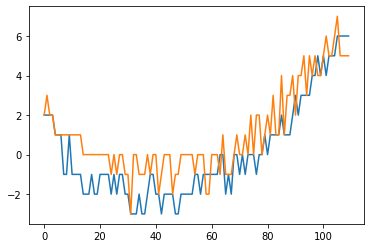

In [61]:
df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_IO.to_numpy())

df_EC_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_IO.to_numpy())

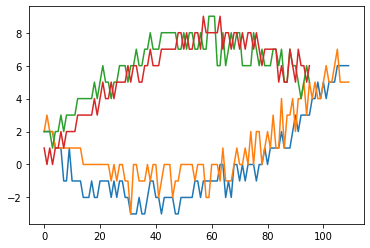

In [68]:
df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_IO.to_numpy())

df_EC_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_IO.to_numpy())
df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_IO.to_numpy())

df_EC_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_IO.to_numpy())

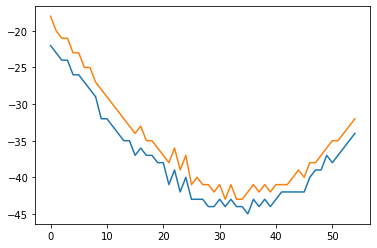

In [31]:
df_EC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_EUROPA.to_numpy())

df_EC_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_EUROPA.to_numpy())

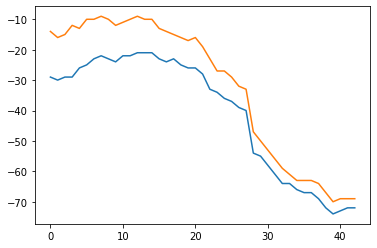

In [32]:
df_EC_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_GANYMEDE.to_numpy())

df_EC_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_GANYMEDE.to_numpy())

For Io and Europa there is roughly a sin-function decribing their yearly variations, confirms hypothesis, innermost and outermost contact coirrelate almost perfectly, allowing for a digitalization error

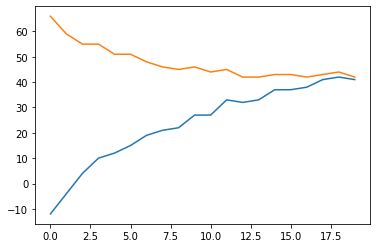

In [33]:
df_EC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_CALLISTO.to_numpy())

df_EC_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_CALLISTO.to_numpy())

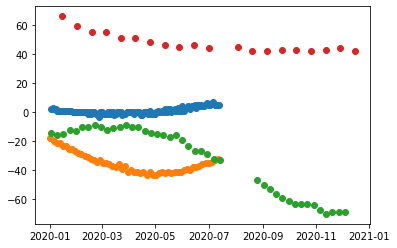

In [59]:
df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO= df_EC_INT_IO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_IO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_IO['deltaTime'].to_numpy())

df_EC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_EUROPA= df_EC_INT_EUROPA[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_EUROPA['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_EUROPA['deltaTime'].to_numpy())

df_EC_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_GANYMEDE= df_EC_INT_GANYMEDE[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_GANYMEDE['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_GANYMEDE['deltaTime'].to_numpy())

df_EC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_CALLISTO= df_EC_INT_CALLISTO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_CALLISTO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_CALLISTO['deltaTime'].to_numpy())

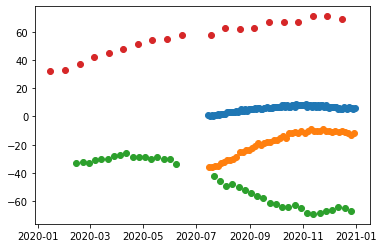

In [60]:
df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO= df_EC_INT_IO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_IO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_IO['deltaTime'].to_numpy())

df_EC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_EUROPA= df_EC_INT_EUROPA[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_EUROPA['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_EUROPA['deltaTime'].to_numpy())

df_EC_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_GANYMEDE= df_EC_INT_GANYMEDE[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_GANYMEDE['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_GANYMEDE['deltaTime'].to_numpy())

df_EC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_CALLISTO= df_EC_INT_CALLISTO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_CALLISTO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_CALLISTO['deltaTime'].to_numpy())

# Penumbra

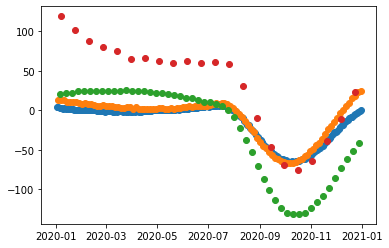

In [64]:
df_PA_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_PA_INT_IO= df_PA_INT_IO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_IO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_IO['deltaTime'].to_numpy())

df_PA_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_PA_INT_EUROPA= df_PA_INT_EUROPA[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_EUROPA['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_EUROPA['deltaTime'].to_numpy())

df_PA_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_PA_INT_GANYMEDE= df_PA_INT_GANYMEDE[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_GANYMEDE['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_GANYMEDE['deltaTime'].to_numpy())

df_PA_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_PA_INT_CALLISTO= df_PA_INT_CALLISTO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_CALLISTO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_CALLISTO['deltaTime'].to_numpy())

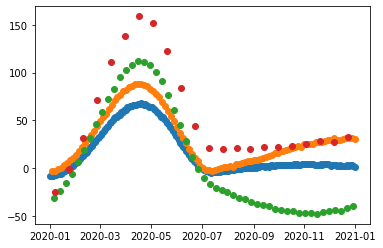

In [65]:
df_PA_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_PA_INT_IO= df_PA_INT_IO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_IO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_IO['deltaTime'].to_numpy())

df_PA_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_PA_INT_EUROPA= df_PA_INT_EUROPA[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_EUROPA['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_EUROPA['deltaTime'].to_numpy())

df_PA_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_PA_INT_GANYMEDE= df_PA_INT_GANYMEDE[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_GANYMEDE['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_GANYMEDE['deltaTime'].to_numpy())

df_PA_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_PA_INT_CALLISTO= df_PA_INT_CALLISTO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_CALLISTO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_CALLISTO['deltaTime'].to_numpy())

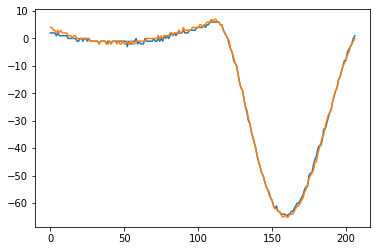

In [72]:
df_PA_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_IO.to_numpy())

df_PA_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_IO.to_numpy())


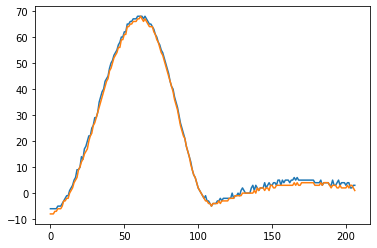

In [67]:
df_PA_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_IO.to_numpy())

df_PA_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_IO.to_numpy())

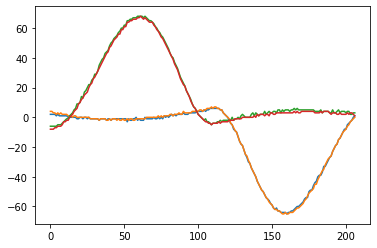

In [70]:
df_PA_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_IO.to_numpy())

df_PA_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_IO.to_numpy())

df_PA_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_IO.to_numpy())

df_PA_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_IO.to_numpy())

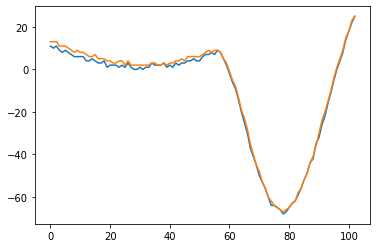

In [71]:
df_PA_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_EUROPA.to_numpy())

df_PA_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_EUROPA.to_numpy())


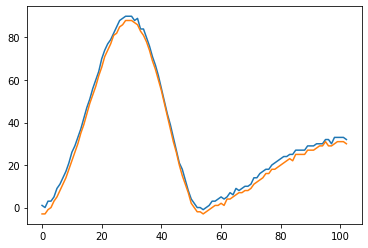

In [73]:
df_PA_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_EUROPA.to_numpy())

df_PA_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_EUROPA.to_numpy())


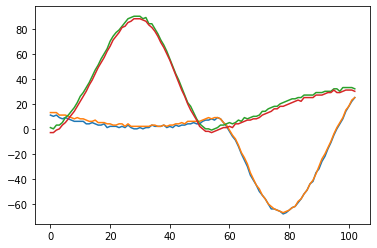

In [74]:
df_PA_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_EUROPA.to_numpy())

df_PA_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_EUROPA.to_numpy())

df_PA_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_EUROPA.to_numpy())

df_PA_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_EUROPA.to_numpy())

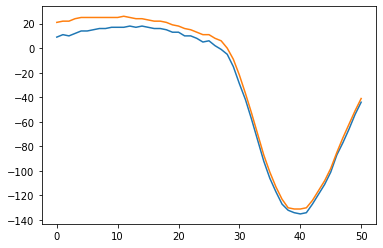

In [75]:
df_PA_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_GANYMEDE.to_numpy())

df_PA_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_GANYMEDE.to_numpy())

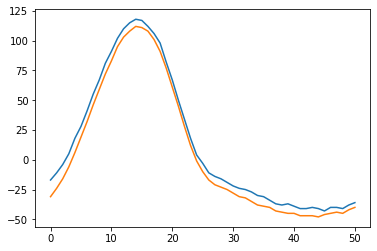

In [76]:
df_PA_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_GANYMEDE.to_numpy())

df_PA_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_GANYMEDE.to_numpy())

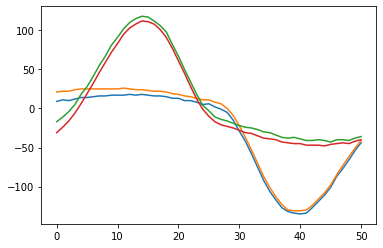

In [77]:
df_PA_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_GANYMEDE.to_numpy())

df_PA_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_GANYMEDE.to_numpy())

df_PA_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_GANYMEDE.to_numpy())

df_PA_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_GANYMEDE.to_numpy())

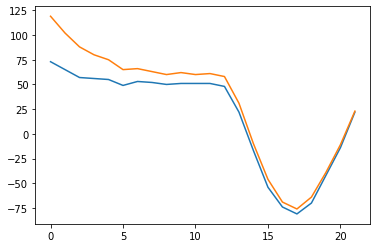

In [78]:
df_PA_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_CALLISTO.to_numpy())

df_PA_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_CALLISTO.to_numpy())

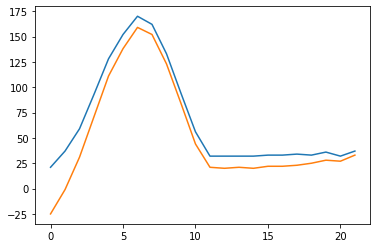

In [79]:
df_PA_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_CALLISTO.to_numpy())

df_PA_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_CALLISTO.to_numpy())

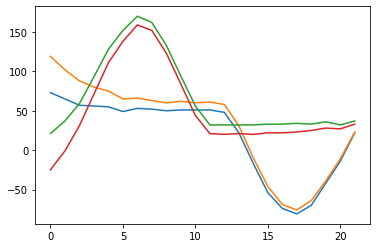

In [80]:
df_PA_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_CALLISTO.to_numpy())

df_PA_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_CALLISTO.to_numpy())

df_PA_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_CALLISTO.to_numpy())

df_PA_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_CALLISTO.to_numpy())

Almost perfect correlation, the database seems to break in july, this needs to be investigated

# OM

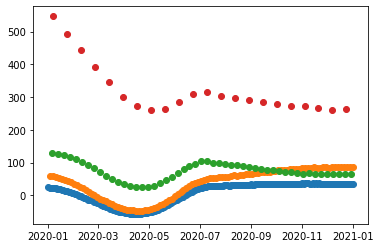

In [81]:
df_OM_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OM_INT_IO= df_OM_INT_IO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_IO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_IO['deltaTime'].to_numpy())

df_OM_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OM_INT_EUROPA= df_OM_INT_EUROPA[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_EUROPA['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_EUROPA['deltaTime'].to_numpy())

df_OM_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OM_INT_GANYMEDE= df_OM_INT_GANYMEDE[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_GANYMEDE['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_GANYMEDE['deltaTime'].to_numpy())

df_OM_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OM_INT_CALLISTO= df_OM_INT_CALLISTO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_CALLISTO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_CALLISTO['deltaTime'].to_numpy())

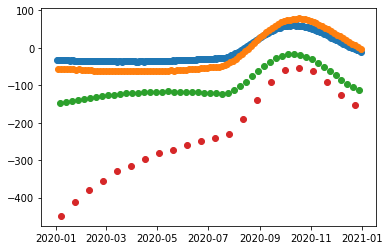

In [82]:
df_OM_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_OM_INT_IO= df_OM_INT_IO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_IO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_IO['deltaTime'].to_numpy())

df_OM_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_OM_INT_EUROPA= df_OM_INT_EUROPA[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_EUROPA['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_EUROPA['deltaTime'].to_numpy())

df_OM_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_OM_INT_GANYMEDE= df_OM_INT_GANYMEDE[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_GANYMEDE['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_GANYMEDE['deltaTime'].to_numpy())

df_OM_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_OM_INT_CALLISTO= df_OM_INT_CALLISTO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_CALLISTO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_CALLISTO['deltaTime'].to_numpy())

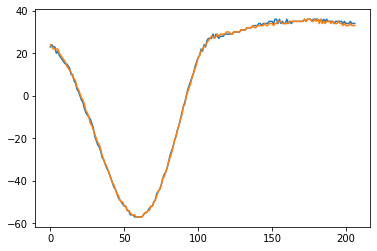

In [83]:
df_OM_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_IO.to_numpy())

df_OM_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_IO.to_numpy())

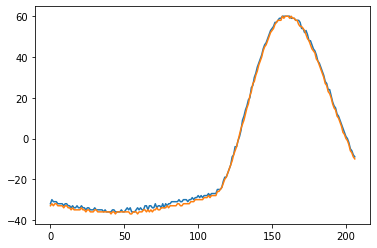

In [84]:
df_OM_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_IO.to_numpy())

df_OM_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_IO.to_numpy())

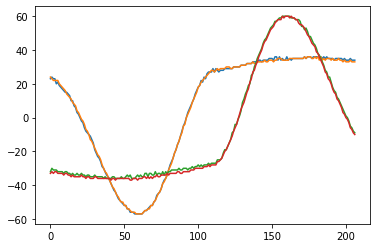

In [85]:
df_OM_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_IO.to_numpy())

df_OM_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_IO.to_numpy())

df_OM_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_IO.to_numpy())

df_OM_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_IO.to_numpy())

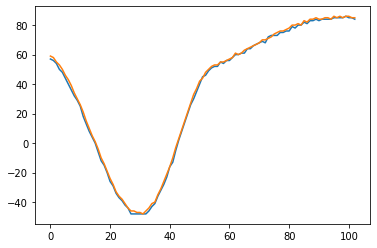

In [86]:
df_OM_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_EUROPA.to_numpy())

df_OM_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_EUROPA.to_numpy())

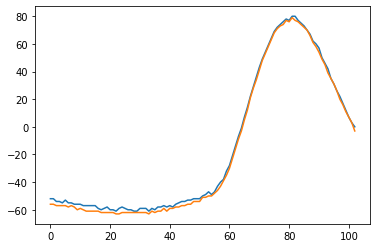

In [87]:
df_OM_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_EUROPA.to_numpy())

df_OM_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_EUROPA.to_numpy())

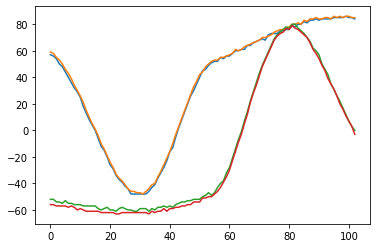

In [88]:
df_OM_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_EUROPA.to_numpy())

df_OM_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_EUROPA.to_numpy())

df_OM_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_EUROPA.to_numpy())

df_OM_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_EUROPA.to_numpy())

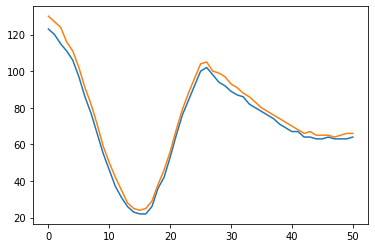

In [89]:
df_OM_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_GANYMEDE.to_numpy())

df_OM_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_GANYMEDE.to_numpy())

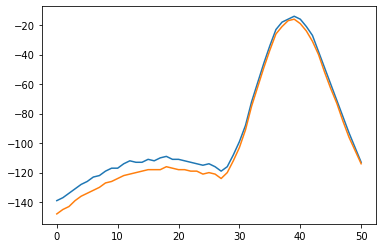

In [90]:
df_OM_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_GANYMEDE.to_numpy())

df_OM_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_GANYMEDE.to_numpy())

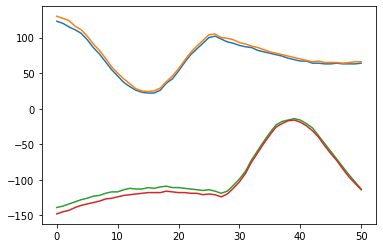

In [91]:
df_OM_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_GANYMEDE.to_numpy())

df_OM_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_GANYMEDE.to_numpy())

df_OM_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_GANYMEDE.to_numpy())

df_OM_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_GANYMEDE.to_numpy())

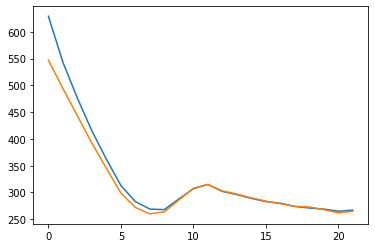

In [92]:
df_OM_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_CALLISTO.to_numpy())

df_OM_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_CALLISTO.to_numpy())

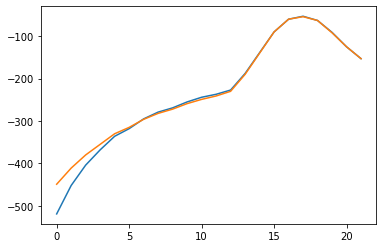

In [93]:
df_OM_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_CALLISTO.to_numpy())

df_OM_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_CALLISTO.to_numpy())

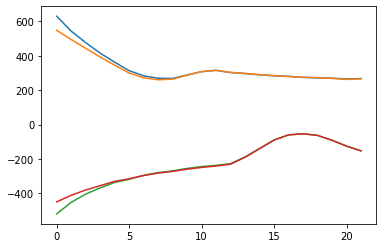

In [94]:
df_OM_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_CALLISTO.to_numpy())

df_OM_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_CALLISTO.to_numpy())

df_OM_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_CALLISTO.to_numpy())

df_OM_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_CALLISTO.to_numpy())

# OC

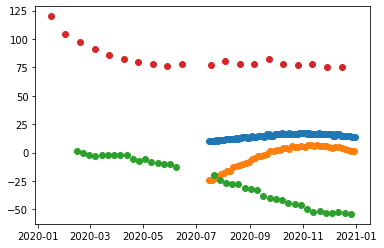

In [95]:
df_OC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OC_INT_IO= df_OC_INT_IO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OC_INT_IO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OC_INT_IO['deltaTime'].to_numpy())

df_OC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OC_INT_EUROPA= df_OC_INT_EUROPA[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OC_INT_EUROPA['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OC_INT_EUROPA['deltaTime'].to_numpy())

df_OC_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OC_INT_GANYMEDE= df_OC_INT_GANYMEDE[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OC_INT_GANYMEDE['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OC_INT_GANYMEDE['deltaTime'].to_numpy())

df_OC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OC_INT_CALLISTO= df_OC_INT_CALLISTO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OC_INT_CALLISTO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OC_INT_CALLISTO['deltaTime'].to_numpy())

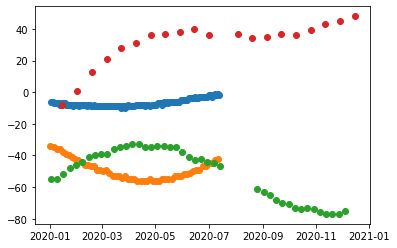

In [96]:
df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO= df_EC_INT_IO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_IO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_IO['deltaTime'].to_numpy())

df_EC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_EUROPA= df_EC_INT_EUROPA[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_EUROPA['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_EUROPA['deltaTime'].to_numpy())

df_EC_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_GANYMEDE= df_EC_INT_GANYMEDE[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_GANYMEDE['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_GANYMEDE['deltaTime'].to_numpy())

df_EC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_CALLISTO= df_EC_INT_CALLISTO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_CALLISTO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_CALLISTO['deltaTime'].to_numpy())

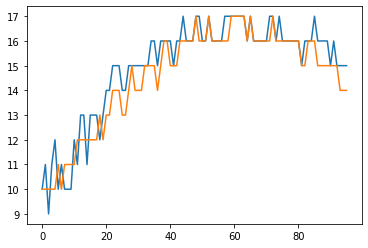

In [97]:
df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_IO.to_numpy())

df_EC_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_IO.to_numpy())

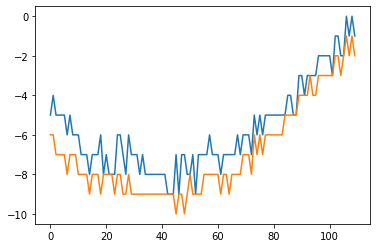

In [98]:
df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_IO.to_numpy())

df_EC_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_IO.to_numpy())

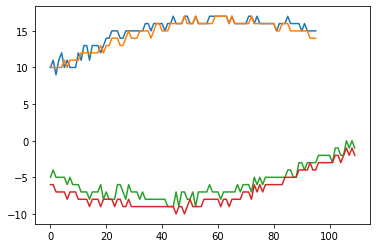

In [99]:
df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_IO.to_numpy())

df_EC_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_IO.to_numpy())

df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_IO.to_numpy())

df_EC_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_IO.to_numpy())

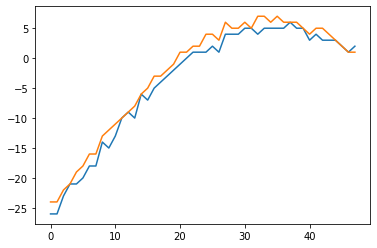

In [100]:
df_EC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_EUROPA.to_numpy())

df_EC_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_EUROPA.to_numpy())

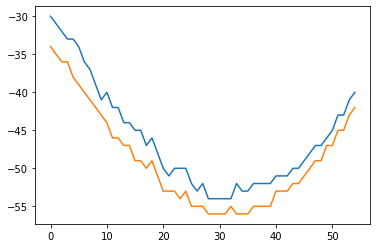

In [101]:
df_EC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_EUROPA.to_numpy())

df_EC_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_EUROPA.to_numpy())

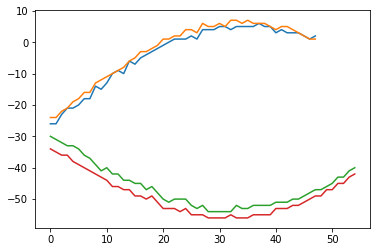

In [102]:
df_EC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_EUROPA.to_numpy())

df_EC_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_EUROPA.to_numpy())

df_EC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_EUROPA.to_numpy())

df_EC_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_EUROPA.to_numpy())

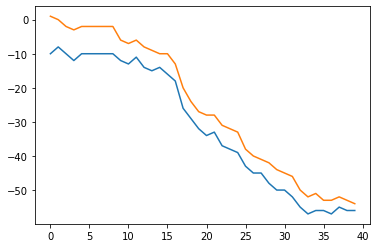

In [104]:
df_EC_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_GANYMEDE.to_numpy())

df_EC_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_GANYMEDE.to_numpy())

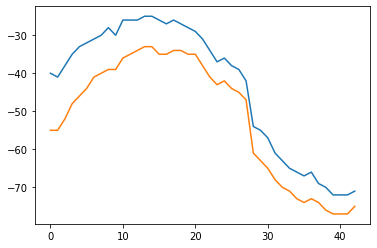

In [105]:
df_EC_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_GANYMEDE.to_numpy())

df_EC_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_GANYMEDE.to_numpy())

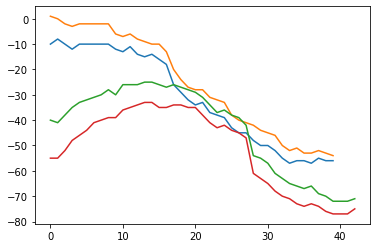

In [106]:
df_EC_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_GANYMEDE.to_numpy())

df_EC_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_GANYMEDE.to_numpy())

df_EC_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_GANYMEDE.to_numpy())

df_EC_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_GANYMEDE.to_numpy())

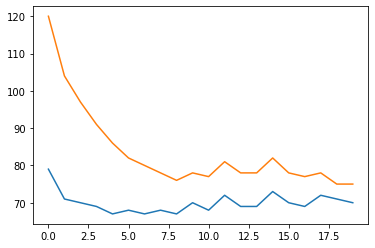

In [107]:
df_EC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_CALLISTO.to_numpy())

df_EC_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_CALLISTO.to_numpy())

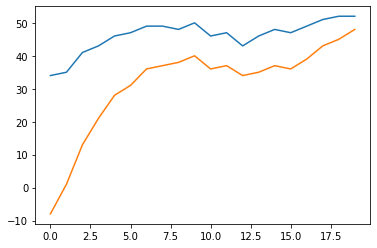

In [108]:
df_EC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_CALLISTO.to_numpy())

df_EC_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_CALLISTO.to_numpy())

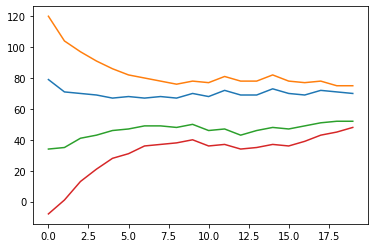

In [109]:
df_OC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OC_INT_CALLISTO.to_numpy())

df_OC_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OC_EXT_CALLISTO.to_numpy())

df_OC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OC_INT_CALLISTO.to_numpy())

df_OC_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OC_EXT_CALLISTO.to_numpy())

For Earthbound events the sine-curves are very similar,the same must be said for un based events